# Introduction to Data Science
## Homework 5

Student Name: Zhengyuan Ding

Student Netid: zd415
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Answer here!

Laplace smoothing is useful when the sample size is small to alleviate overfitting problem. For instance, class c only has 10 samples and the appearance of feature $e_i$ is zero(count($e_i,c$)=0) in this class. Then without Laplace smoothing, we would estimate $P(e_i|c)=0$.This means that we will always classify data points with feature $e_i$ with zero probability to be class c, resulting in a "bad" model. Laplace smoothing in this case reflects some uncertainty by adding a constant to both the denominator and the numerator. In terms of bias-variance tradeoff, it helps reduce the variance in the overfitting case.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [1]:
import pandas as pd
data = pd.read_csv('data/imdb.csv',quotechar="'", escapechar="\\")

In [2]:
data.head()

,Text,Class
0,One of the first of the best musicals Anchors ...,P
1,Visually disjointed and full of itself the dir...,N
2,These type of movies about young teenagers str...,P
3,I would rather of had my eyes gouged out with ...,N
4,The title says it all. Tail Gunner Joe was a t...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [3]:
# Code here
data['Class'] = pd.Series(data['Class'] == 'P', dtype=int)

In [4]:
data.head()

,Text,Class
0,One of the first of the best musicals Anchors ...,1
1,Visually disjointed and full of itself the dir...,0
2,These type of movies about young teenagers str...,1
3,I would rather of had my eyes gouged out with ...,0
4,The title says it all. Tail Gunner Joe was a t...,0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [5]:
#Code here
from sklearn.model_selection import train_test_split
X = data['Text']
Y = data['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

/Users/carold/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = CountVectorizer(stop_words = 'english', ngram_range=(1,2),binary=True)
count_vectorizer.fit(X_train)
X_train1 = count_vectorizer.transform(X_train)
X_test1 = count_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range=(1,2),binary=True)
tfidf_vectorizer.fit(X_train)
X_train2 = tfidf_vectorizer.transform(X_train)
X_test2 = tfidf_vectorizer.transform(X_test)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

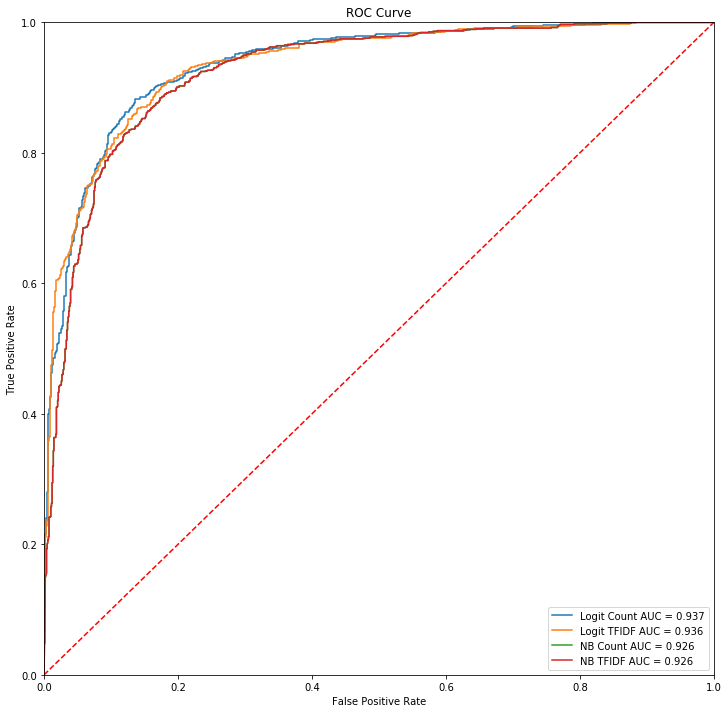

In [7]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

# Code here
clf_logit1 = LogisticRegression()
clf_logit1.fit(X_train1, Y_train)
clf_logit2 = LogisticRegression()
clf_logit2.fit(X_train2, Y_train)

clf_bern1 = BernoulliNB()
clf_bern1.fit(X_train1, Y_train)
clf_bern2 = BernoulliNB()
clf_bern2.fit(X_train2, Y_train)

fpr_logit1, tpr_logit1, thresholds_logit1 = metrics.roc_curve(Y_test, clf_logit1.predict_proba(X_test1)[:,1])
auc_logit1 = metrics.auc(fpr_logit1, tpr_logit1)
fpr_logit2, tpr_logit2, thresholds_logit2 = metrics.roc_curve(Y_test, clf_logit2.predict_proba(X_test2)[:,1])
auc_logit2 = metrics.auc(fpr_logit2, tpr_logit2)

fpr_bern1, tpr_bern1, thresholds_bern1 = metrics.roc_curve(Y_test, clf_bern1.predict_proba(X_test1)[:,1])
auc_bern1 = metrics.auc(fpr_bern1, tpr_bern1)
fpr_bern2, tpr_bern2, thresholds_bern2 = metrics.roc_curve(Y_test, clf_bern2.predict_proba(X_test2)[:,1])
auc_bern2 = metrics.auc(fpr_bern2, tpr_bern2)

plt.title('ROC Curve')
plt.plot(fpr_logit1, tpr_logit1, label = 'Logit Count AUC = %0.3f' % auc_logit1)
plt.plot(fpr_logit2, tpr_logit2, label = 'Logit TFIDF AUC = %0.3f' % auc_logit2)
plt.plot(fpr_bern1, tpr_bern1, label = 'NB Count AUC = %0.3f' % auc_bern1)
plt.plot(fpr_bern2, tpr_bern2, label = 'NB TFIDF AUC = %0.3f' % auc_bern2)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic regressions have a better performance than Bernoulli Naive Bayes models since it has a higher AUC score. The reason may be that the features are not really conditionally independently here, which breaks the assumption of the Bernoulli NB model. 

Extra Credit:

In NB model the Count and TFIDF vectorizer perform identically. This is because of the formula of NB model:
$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$
, where $P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.=TF(e_i,c)$ and $P(E) = p(e_1|c_0)p(e_2|c_0)\cdots p(e_i|c_0)p(c_0)+ p(e_1|c_1)p(e_2|c_1)\cdots p(e_i|c_1)p(c_1)+\cdots$

According to the formula of TFIDF ($TFIDF = \frac{TF}{IDF}$), the IDF part is reduced since it appears in both the denominater and numerator of the NB formula. Thus the TFIDF is basically same as the count method.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [8]:
# Code here to display 5 incorrect reviews.
clf = LogisticRegression()
clf.fit(X_train1, Y_train)
preds = clf.predict(X_test1)
count = 0

for i in range(len(preds)):
    if (count >= 5): break
    if (Y_test.iloc[i] == 1) and not (preds[i] == 1):
        count += 1
        print('review idx '+ str(i)+': ')
        print(X_test.iloc[i]+'\n')

review idx 0: 
its movies like these that make you wish that you never picked on the nerd growing up in school. If you liked this movie then I would suggest you watch Valentine. I just found out today that the guy who played Marty(Simon) killed himself a little after the movie was released which is a shame since he did a good job. I wonder if its because of the part he played in the movie. It starts out when Carol tricks him into going into the girls restroom to act like they were about to do it. When he was changing in the showers Carols popular friends snuck into the bathroom and got everything ready camera electric shock pole. When Marty open the curtain butt naked he realized that he was tricked. He tries to cover the shower up but the kids open it grab Marty and starts being mean to him while the camera is rolling. They picked him up dunked his head in the toliet while it was being flushed and they electricuted him(slightly). When the kids are in detention given by the coach 2 of 

Explanation for the 5 reviews chosen here!

These reviews include many negative words like "bad", "disturbing" etc. There are many turns in the meaning in these reviews, from negative to positive sentiments. The model may be influnced by these words and turnings and makes a wrong classification. Also much of the content is neutral, for example, a description of the plot. Thus, there is no strong evidence of the reviews being positive or negative.